<a href="https://colab.research.google.com/github/dryogeshrajput/Detection-and-Counting-Microaneurysm/blob/main/MACount.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [46]:
image = cv2.imread("22.jpg")

In [47]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(image, (2, 5))

In [48]:
threshold_value = 127
thresholded = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY)[1]
edges = cv2.Canny(gray, 100, 200)
dy = cv2.Sobel(gray, cv2.CV_64F, 0, 1)

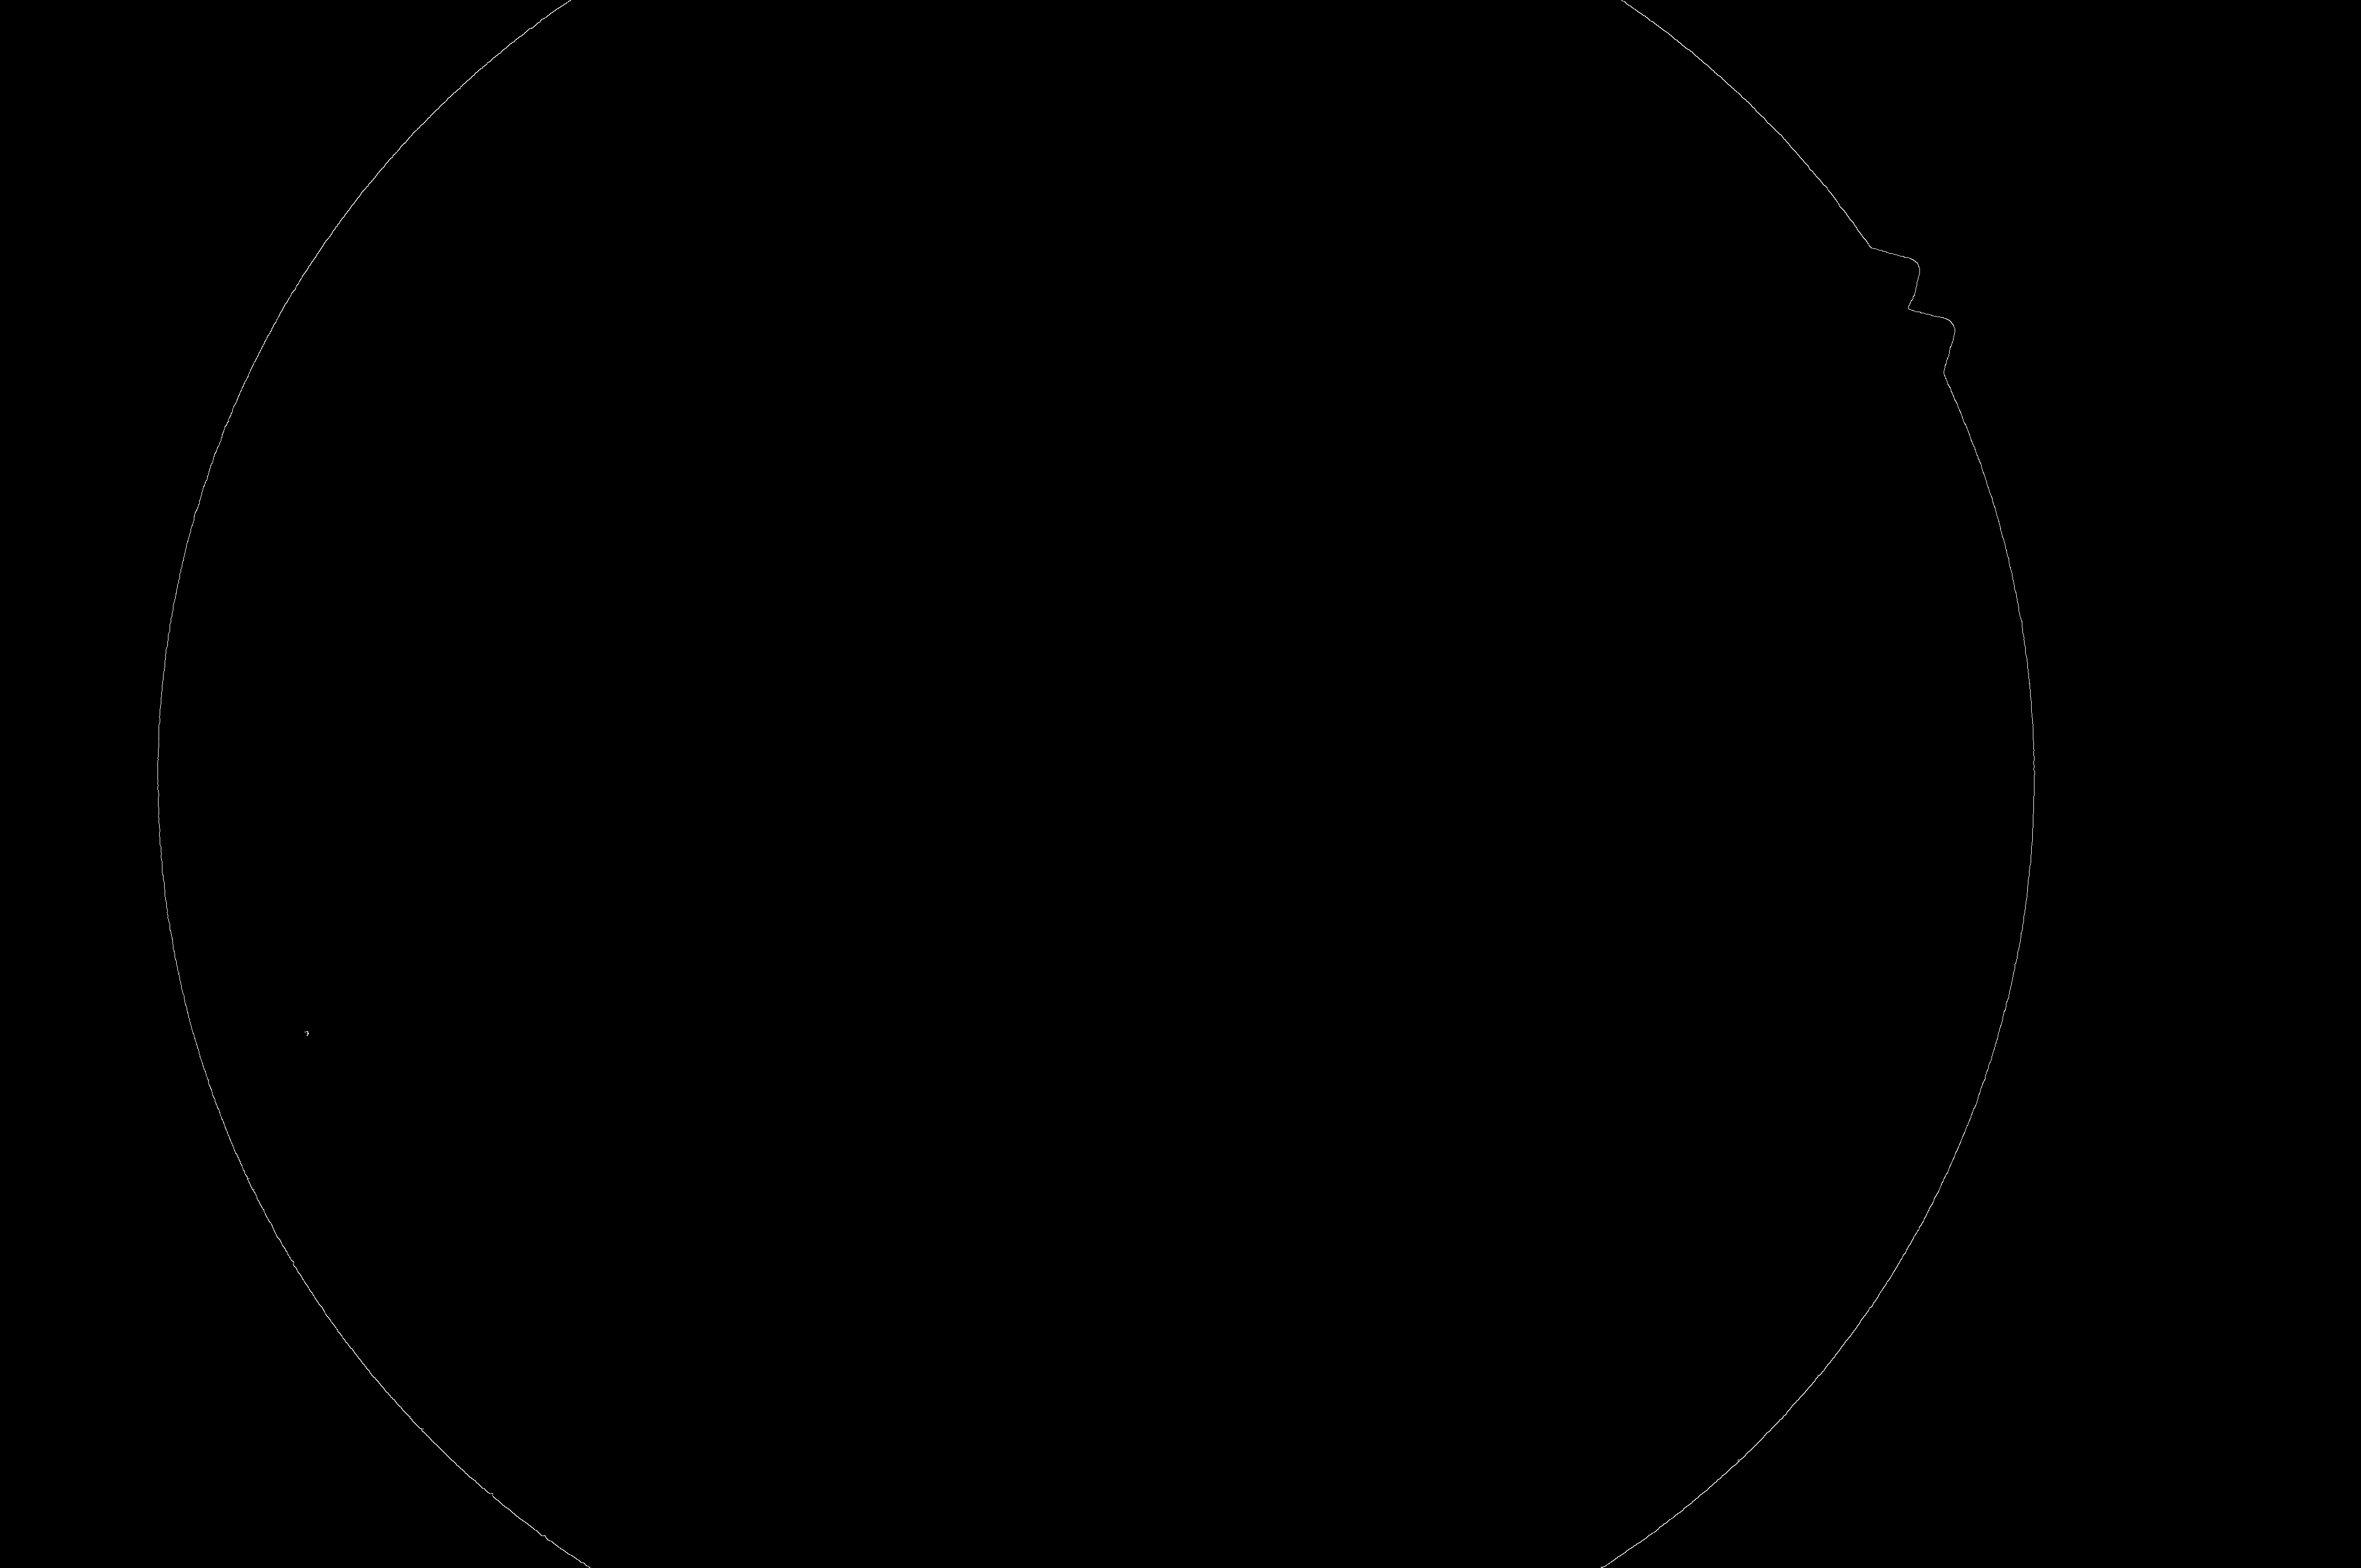

In [50]:
cv2_imshow(edges)

In [63]:
#Import Packages
import cv2
import numpy as np

#Read Fundus Image
image = cv2.imread("22_Training.jpg")
def adjust_gamma(image, gamma=1.0):
  
   table = np.array([((i / 255.0) ** gamma) * 255
      for i in np.arange(0, 256)]).astype("uint8")

   return cv2.LUT(image, table)

#Split Image and Gamma Correction
def extract_ma(image):
    r,g,b=cv2.split(image)
    comp=255-g
    clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8,8))
    histe=clahe.apply(comp)
    adjustImage = adjust_gamma(histe,gamma=3)
    comp = 255-adjustImage
    J =  adjust_gamma(comp,gamma=4)
    J = 255-J
    J = adjust_gamma(J,gamma=4)
    
    K=np.ones((11,11),np.float32)
    L = cv2.filter2D(J,-1,K)

#Threshold and Morphological Operations
    ret3,thresh2 = cv2.threshold(L,125,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)
    kernel2=np.ones((9,9),np.uint8)
    tophat = cv2.morphologyEx(thresh2, cv2.MORPH_TOPHAT, kernel2)
    kernel3=np.ones((7,7),np.uint8)
    opening = cv2.morphologyEx(tophat, cv2.MORPH_OPEN, kernel3)
    return opening

#Save the MN image
if __name__ == "__main__":
    fundus = cv2.imread("22_Training.jpg")
    Microaneurysms = extract_ma(fundus)
    
    cv2.imwrite("22_MA.png",Microaneurysms)

    # Count Microaneurysms
    num_MA, label = cv2.connectedComponents(Microaneurysms)
    num_MA_dots = num_MA - 1

    # Print the Number of Microaneurysms
    print('Number of Microaneurysms :', num_MA_dots)

Number of Microaneurysms : 54
